# Data Preprocessing Pipeline

## Pre-processing

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [ ]:
def describe_dataset(df):
  # List Columns
  print("Original Size: ")
  print(df.shape)
  print("Labels: ")
  for col in df.columns:
    print(col)
  print("--------")
  df = df.copy()[['sentence1','sentence2','gold_label']]
  df.rename(columns = {'sentence1':'premise', 'sentence2':'hypothesis',
                              'gold_label':'classification'}, inplace = True)
  print("Removing unclassified sentence pairs")
  before = df.shape[0]
  df = df[df["classification"] != "-"]
  after = df.shape[0]
  print(f"Number of rows removed: {before-after}")
  print("--------")
  print("Removing null and N/A values")
  before = df.shape[0]
  df = df[df["hypothesis"].notnull()]
  df = df[df["hypothesis"] != "n/a"]
  df = df[df["hypothesis"] != "N/a"]
  after = df.shape[0]
  print(f"Number of rows removed: {before-after}")
  print("--------")
  label_counts = dict(df.groupby("classification")["classification"].count())
  print(f"Final number of rows [{df.shape[0]}]")
  print(f"Final number of columns [{df.shape[1]}]")
  print("--------")
  print("Dataset Distribution:")
  for key,value in label_counts.items():
    print(f"{key}: {100*value/(df.shape[0])}%")
  print("--------")
  print(f"Number of unique premises {df[['premise']].nunique().values}")
  print("--------")
  return df



In [ ]:
def describe_merged_dataset(df):
  # List Columns
  print("Labels: ")
  for col in df.columns:
    print(col)
  print("--------")
  label_counts = dict(df.groupby("classification")["classification"].count())
  print(f"Number of rows [{df.shape[0]}]")
  print(f"Number of columns [{df.shape[1]}]")
  print("--------")
  print("Dataset Distribution:")
  for key,value in label_counts.items():
    print(f"{key}: {100*value/(df.shape[0])}%")
  print("--------")
  print(f"Number of unique premises {df[['premise']].nunique().values}")
  print("--------")
  return df

In [ ]:
def preproc_to_csv(df, out_filename):
  df = df.copy()[['sentence1','sentence2','gold_label']]
  df.rename(columns = {'sentence1':'premise', 'sentence2':'hypothesis',
                              'gold_label':'classification'}, inplace = True)
  df = df[df["classification"] != "-"]
  df = df[df["hypothesis"].notnull()]
  df = df[df["hypothesis"] != "n/a"]
  df = df[df["hypothesis"] != "N/a"]
  df.to_csv('/content/drive/MyDrive/Dissertation/data/preproc_csv/' + out_filename, encoding='utf-8',sep=';')
  print(f"Preprocessed data stored in file [{out_filename}]")

In [ ]:
df_snli_dev = pd.read_csv('/content/drive/MyDrive/Dissertation/data/snli_1.0/snli_1.0_dev.txt', sep='\t', engine='python')
df_snli_dev_new = describe_dataset(df_snli_dev)
preproc_to_csv(df_snli_dev,'df_snli_dev.csv')

In [ ]:
df_snli_test = pd.read_csv('/content/drive/MyDrive/Dissertation/data/snli_1.0/snli_1.0_test.txt', sep='\t', engine='python')
df_snli_test_new = describe_dataset(df_snli_test)
preproc_to_csv(df_snli_test,'df_snli_test.csv')

In [ ]:
df_snli_train = pd.read_csv('/content/drive/MyDrive/Dissertation/data/snli_1.0/snli_1.0_train.txt', sep='\t', engine='python')
df_snli_train_new = describe_dataset(df_snli_train)
preproc_to_csv(df_snli_train,'df_snli_train.csv')

In [ ]:
df_snli_merged = pd.concat([df_snli_dev, df_snli_train, df_snli_test])
df_snli_merged = describe_dataset(df_snli_merged)

Original Size: 
(570152, 14)
Labels: 
gold_label
sentence1_binary_parse
sentence2_binary_parse
sentence1_parse
sentence2_parse
sentence1
sentence2
captionID
pairID
label1
label2
label3
label4
label5
--------
Removing unclassified sentence pairs
Number of rows removed: 1119
--------
Removing null and N/A values
Number of rows removed: 6
--------
Final number of rows [569027]
Final number of columns [3]
--------
Dataset Distribution:
contradiction: 33.33760963890993%
entailment: 33.409838197484476%
neutral: 33.25255216360559%
--------
Number of unique premises [157350]
--------


In [ ]:
df_snli_merged = pd.concat([df_snli_dev_new, df_snli_test_new, df_snli_train_new])
describe_merged_dataset(df_snli_merged)

In [ ]:
df_mnli_dev = pd.read_json('/content/drive/MyDrive/Dissertation/data/multinli_1.0/multinli_1.0_dev.jsonl', lines=True)
df_mnli_dev_new = describe_dataset(df_mnli_dev)
preproc_to_csv(df_mnli_dev,'df_mnli_dev.csv')

In [ ]:
df_mnli_train = pd.read_json('/content/drive/MyDrive/Dissertation/data/multinli_1.0/multinli_1.0_train.jsonl', lines=True)
df_mnli_train_new = describe_dataset(df_mnli_train)
preproc_to_csv(df_mnli_train,'df_mnli_train.csv')

In [ ]:
df_mnli_merged = pd.concat([df_mnli_train, df_mnli_dev])
df_mnli_merged = describe_dataset(df_mnli_merged)

Original Size: 
(402702, 11)
Labels: 
annotator_labels
genre
gold_label
pairID
promptID
sentence1
sentence1_binary_parse
sentence1_parse
sentence2
sentence2_binary_parse
sentence2_parse
--------
Removing unclassified sentence pairs
Number of rows removed: 185
--------
Removing null and N/A values
Number of rows removed: 43
--------
Final number of rows [402474]
Final number of columns [3]
--------
Dataset Distribution:
contradiction: 33.319170927811484%
entailment: 33.384516763815796%
neutral: 33.29631230837271%
--------
Number of unique premises [131361]
--------


# Uniformity

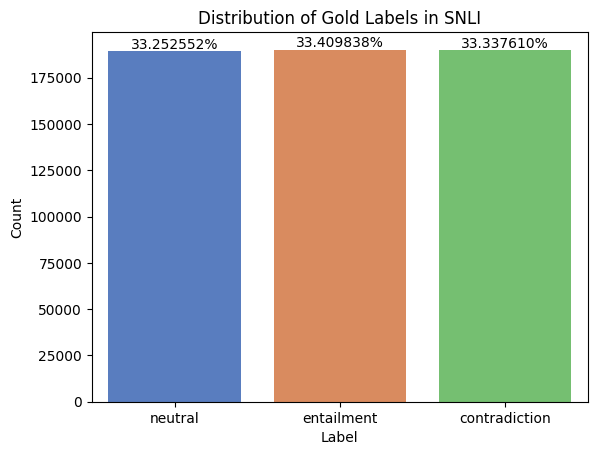

In [ ]:
ax = sns.countplot(x="classification", data=df_snli_merged, palette="muted")
bars = ax.containers[0]
ax.bar_label(bars, labels = [f'{x.get_height()/df_snli_merged.shape[0]:%}' for x in bars])
plt.title("Distribution of Gold Labels in SNLI")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

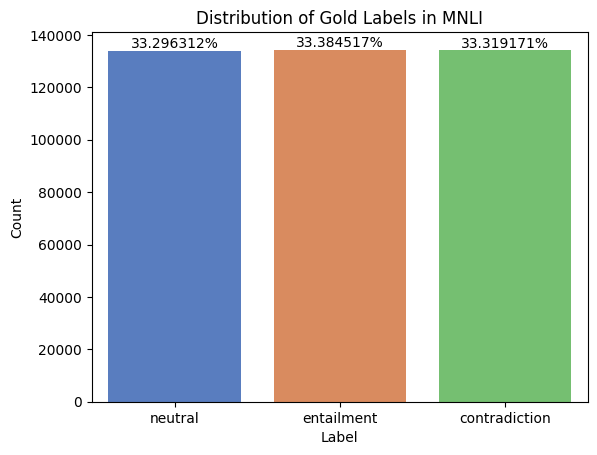

In [ ]:
ax = sns.countplot(x="classification", data=df_mnli_merged, palette="muted")
bars = ax.containers[0]
ax.bar_label(bars, labels = [f'{x.get_height()/df_mnli_merged.shape[0]:%}' for x in bars])
plt.title("Distribution of Gold Labels in MNLI")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# N-grams

In [ ]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_en = list(stopwords.words('english'))

def cleanReviews(documents):
  cleanedReviews = []
  for document in documents:
      s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
      s = re.sub('\s+',' ', s)
      s = str(s).lower()
      tokens = [token for token in s.split(" ") if token != ""]
      tokens = [word for word in tokens if word not in stopwords_en]
      tokens = [word for word in tokens if word not in ['um','u','r','uh','n']]
      review = ' '.join(tokens)
      cleanedReviews.append(review)
  return(cleanedReviews)

def documentNgrams(documents, size):
  ngrams_all = []
  for document in documents:
    tokens = document.split()
    if len(tokens) <= size:
      continue
    else:
      output = list(ngrams(tokens, size))
    for ngram in output:
      ngrams_all.append(" ".join(ngram))
  cnt_ngram = Counter()
  for word in ngrams_all:
    cnt_ngram[word] += 1
  df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
  df = df.rename(columns={'index':'words', 0:'count'})
  df = df.sort_values(by='count', ascending=False)
  df = df.head(15)
  df = df.sort_values(by='count')
  return(df)

def plotNgrams(documents, title):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)

    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title("Unigrams - " + title)
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title("Bigrams - " + title)
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    plt.show()

def textTrends(documents, title):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews, title)

In [ ]:
snli_list = df_snli_merged['hypothesis'].tolist()
snli_list.extend(df_snli_merged['premise'].tolist())

In [ ]:
mnli_list = df_mnli_merged['hypothesis'].tolist()
mnli_list.extend(df_mnli_merged['premise'].tolist())

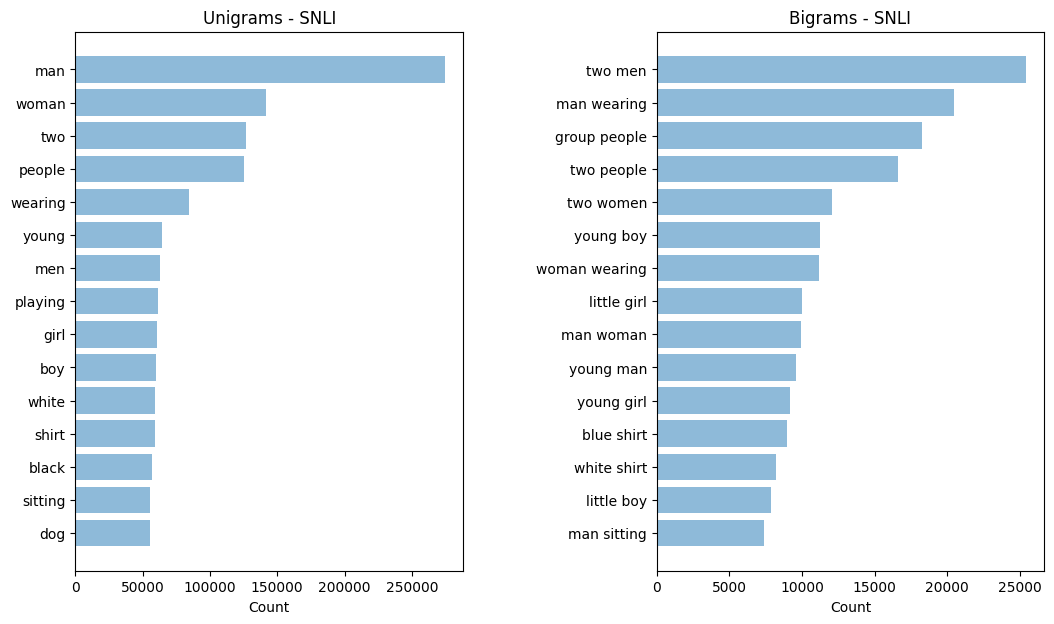

In [ ]:
textTrends(snli_list, 'SNLI')

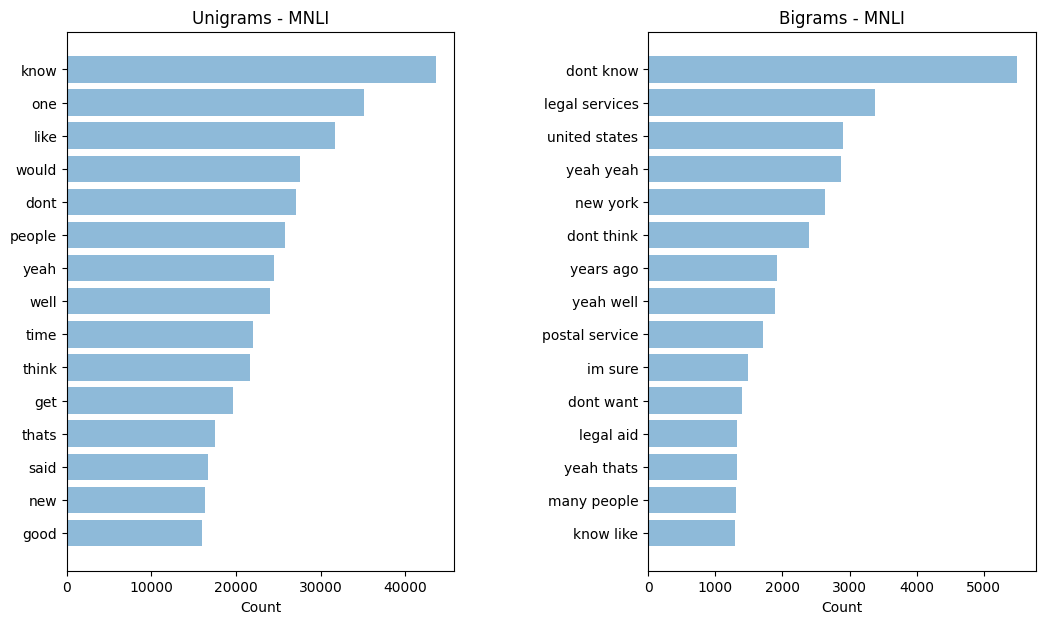

In [ ]:
textTrends(mnli_list, 'MNLI')